##Data Augmentation

##Generating augmented images

In [1]:
# import tensorflow as tf
# from tensorflow import keras
# from keras.preprocessing.image import ImageDataGenerator
# datagen = ImageDataGenerator(
# rotation_range=40,
# width_shift_range=0.2,
# height_shift_range=0.2,
# shear_range=0.2,
# zoom_range=0.2,
# fill_mode='nearest')

# DATADIR = r"C:\Users\Vaibhavi\Desktop\OCR\training"
# CATEGORIES = ["0" , "1" , "2" , "3" , "4" , "5" , "6" , "7" , "8" , "9"]
# for category in CATEGORIES:
#     path = os.path.join(DATADIR, category)
#     for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path, img))
#         img_array = img_array.reshape((1,)+img_array.shape)
#         i=0
#         for batch in datagen.flow(img_array, batch_size=1, save_to_dir=r"C:\Users\Vaibhavi\Desktop\OCR\preview", save_prefix= 'aug'+category, save_format='png'):
#             i+=1
#             if i>10:
#                 break
            

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



DATADIR = r"C:\Users\Vaibhavi\Desktop\OCR\preview"
CATEGORIES = ["0" , "1" , "2" , "3" , "4" , "5" , "6" , "7" , "8" , "9"]
trainingdata = []
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    classnum = CATEGORIES.index(category)
    for img in os.listdir(path):
        imgarray = cv2.resize(cv2.imread(os.path.join(path, img)), (100,100))
#         plt.imshow(imgarray)
#         plt.show()
#         break
#     break
        trainingdata.append([imgarray , classnum])
        

In [3]:
len(trainingdata)

4600

In [4]:
trainingdata[0]

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [5]:
import random
random.shuffle(trainingdata)

In [6]:
trainingdata[0]

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [7]:
xtrain = []
ytrain = []
for sample in trainingdata:
    xtrain.append(sample[0])
    ytrain.append(sample[1])

xtrain = np.array(xtrain)/255
ytrain = np.array(ytrain, dtype = int)
xtrain.ndim, ytrain.ndim

(4, 1)

In [8]:
xtrain[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

##CNN Model

##Neural network with one hidden layer

In [9]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [10]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(xtrain, ytrain, epochs=10)

Epoch 1/10
144/144 [==============================] - 43s 293ms/step - loss: 2.1858 - accuracy: 0.2137
Epoch 2/10
144/144 [==============================] - 42s 292ms/step - loss: 1.3851 - accuracy: 0.5443
Epoch 3/10
144/144 [==============================] - 42s 292ms/step - loss: 0.6047 - accuracy: 0.8104
Epoch 4/10
144/144 [==============================] - 42s 291ms/step - loss: 0.1608 - accuracy: 0.9541
Epoch 5/10
144/144 [==============================] - 42s 292ms/step - loss: 0.0341 - accuracy: 0.9937
Epoch 6/10
144/144 [==============================] - 39s 270ms/step - loss: 0.0062 - accuracy: 0.9985
Epoch 7/10
144/144 [==============================] - 38s 267ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 8/10
144/144 [==============================] - 41s 284ms/step - loss: 9.2506e-04 - accuracy: 1.0000
Epoch 9/10
144/144 [==============================] - 39s 273ms/step - loss: 6.5875e-04 - accuracy: 1.0000
Epoch 10/10
144/144 [==============================] - 40s 274ms/

In [11]:
fname = "weights-with DA-simple CNN"
cnn.save_weights(fname, overwrite = True)

#Testing

In [12]:
dirpath = r"C:\Users\Vaibhavi\Desktop\OCR\residual"
labels = [0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,6,6,6,6,6,7,7,7,7,7,8,8,8,8,8,9,9,9,9,9]
testingdata=[]
 
for i in os.listdir(dirpath):
    testarray = cv2.resize(cv2.imread(os.path.join(dirpath, i)), (100, 100))
    testingdata.append(testarray)
     
xtest = np.array(testingdata)/255
ytest = np.array(labels)
cnn.evaluate(xtest, ytest)
prediction = cnn.predict(xtest)

2/2 [==============================] - 1s 60ms/step - loss: 2.5166 - accuracy: 0.5600


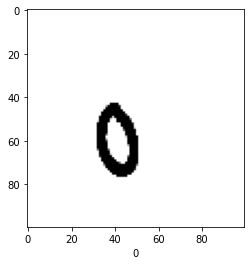

CNN Model predicts this digit to be : 0


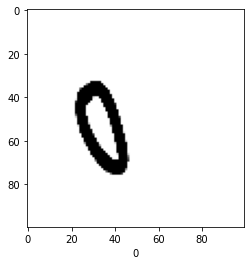

CNN Model predicts this digit to be : 0


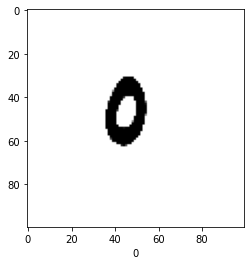

CNN Model predicts this digit to be : 0


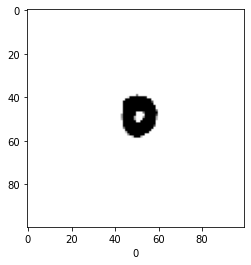

CNN Model predicts this digit to be : 5


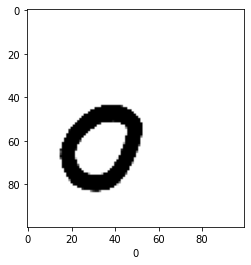

CNN Model predicts this digit to be : 0


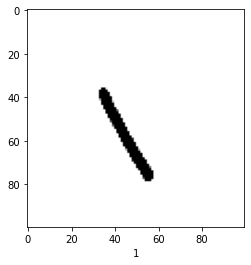

CNN Model predicts this digit to be : 1


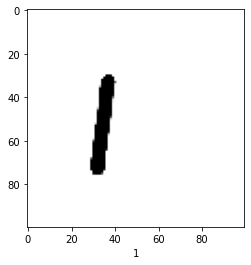

CNN Model predicts this digit to be : 1


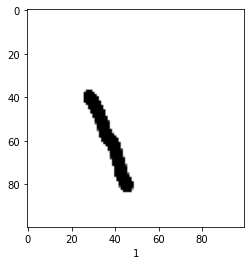

CNN Model predicts this digit to be : 0


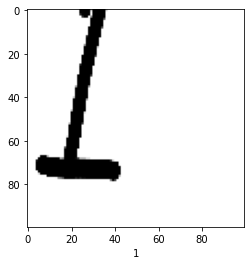

CNN Model predicts this digit to be : 1


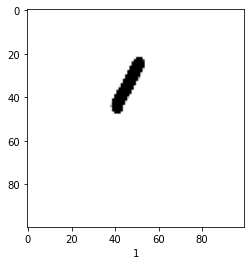

CNN Model predicts this digit to be : 1


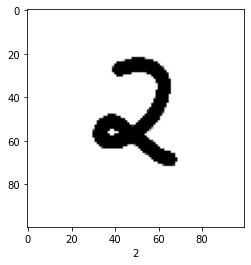

CNN Model predicts this digit to be : 3


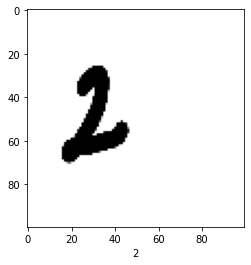

CNN Model predicts this digit to be : 2


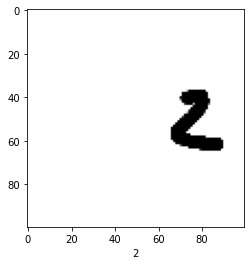

CNN Model predicts this digit to be : 4


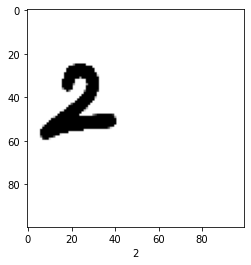

CNN Model predicts this digit to be : 9


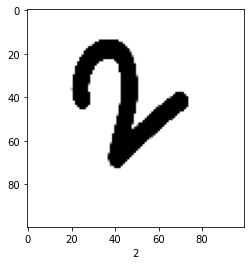

CNN Model predicts this digit to be : 2


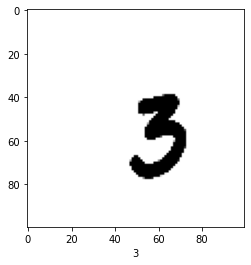

CNN Model predicts this digit to be : 3


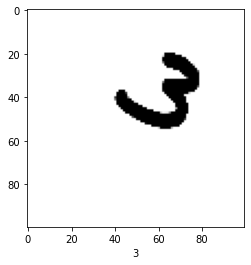

CNN Model predicts this digit to be : 5


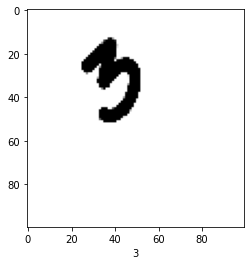

CNN Model predicts this digit to be : 3


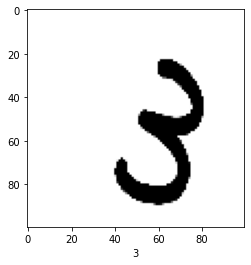

CNN Model predicts this digit to be : 2


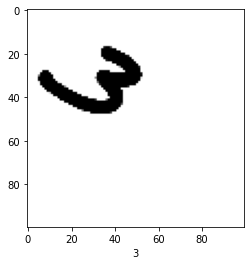

CNN Model predicts this digit to be : 3


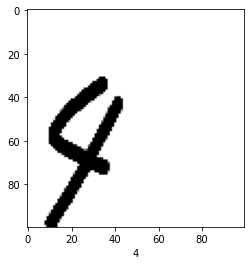

CNN Model predicts this digit to be : 4


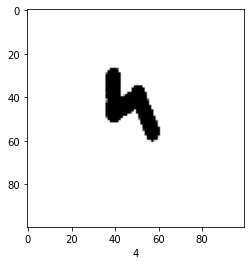

CNN Model predicts this digit to be : 4


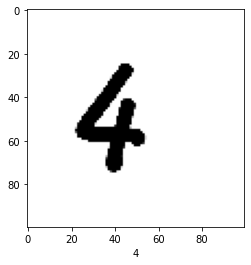

CNN Model predicts this digit to be : 4


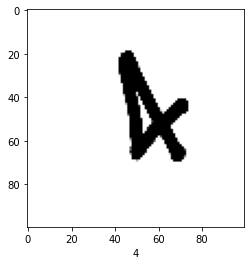

CNN Model predicts this digit to be : 4


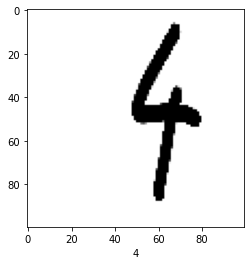

CNN Model predicts this digit to be : 7


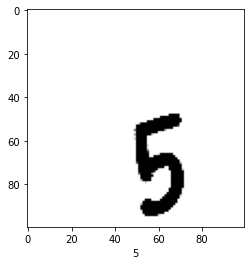

CNN Model predicts this digit to be : 6


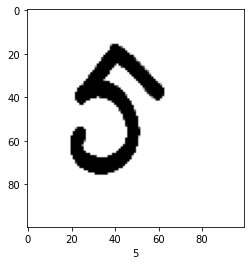

CNN Model predicts this digit to be : 5


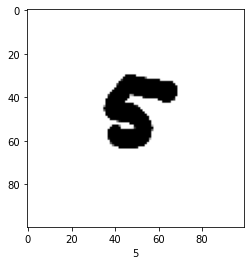

CNN Model predicts this digit to be : 5


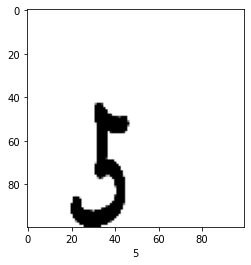

CNN Model predicts this digit to be : 3


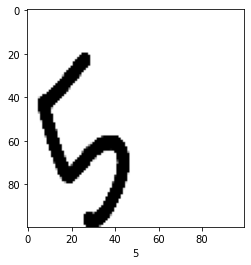

CNN Model predicts this digit to be : 5


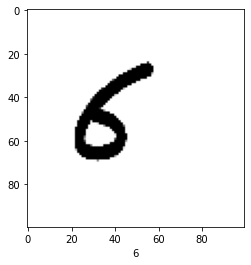

CNN Model predicts this digit to be : 5


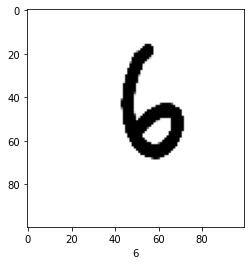

CNN Model predicts this digit to be : 6


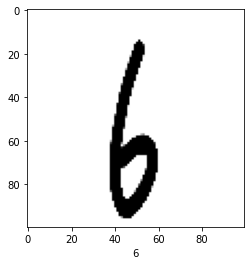

CNN Model predicts this digit to be : 2


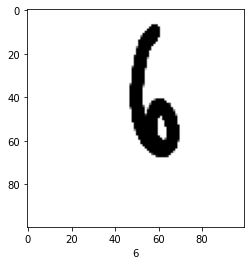

CNN Model predicts this digit to be : 6


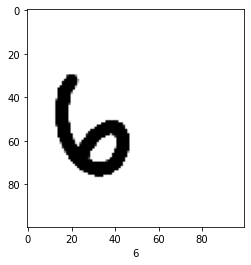

CNN Model predicts this digit to be : 0


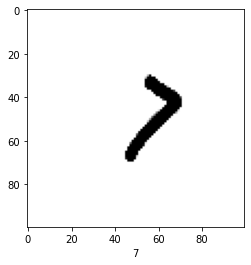

CNN Model predicts this digit to be : 7


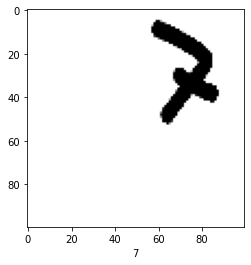

CNN Model predicts this digit to be : 5


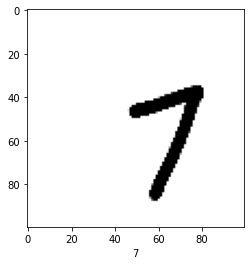

CNN Model predicts this digit to be : 1


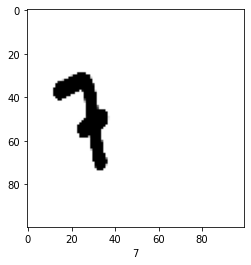

CNN Model predicts this digit to be : 9


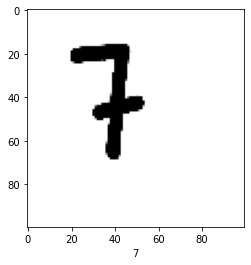

CNN Model predicts this digit to be : 7


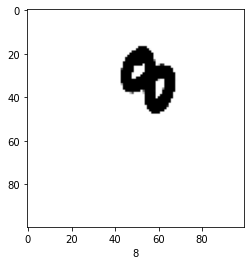

CNN Model predicts this digit to be : 7


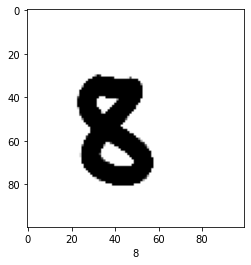

CNN Model predicts this digit to be : 8


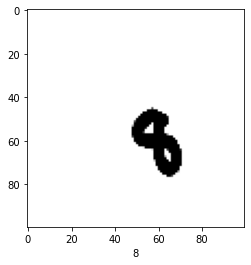

CNN Model predicts this digit to be : 6


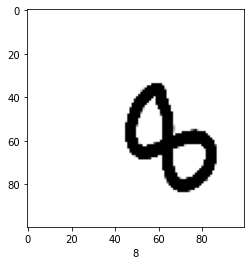

CNN Model predicts this digit to be : 4


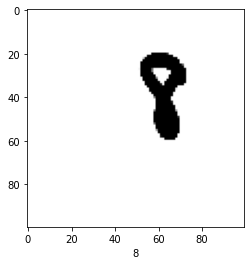

CNN Model predicts this digit to be : 9


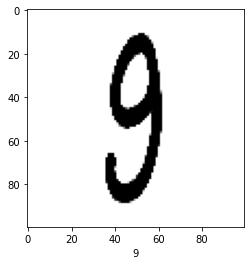

CNN Model predicts this digit to be : 0


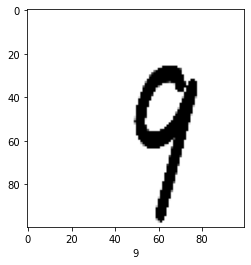

CNN Model predicts this digit to be : 9


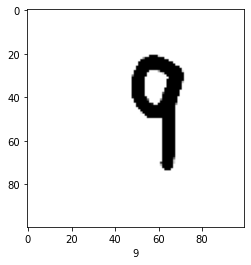

CNN Model predicts this digit to be : 9


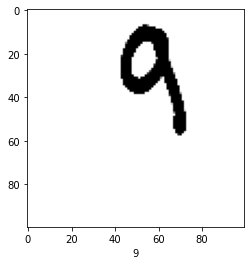

CNN Model predicts this digit to be : 8


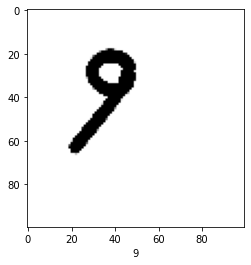

CNN Model predicts this digit to be : 9


In [13]:
j=0
for array in testingdata:
    plt.imshow(array)
    plt.xlabel(labels[j])
    plt.show()    
    print('CNN Model predicts this digit to be :', np.argmax(prediction[j]))
    j+=1